In [312]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import json
import urllib2
import datetime, time
import pandas as pd
import seaborn as sns
%matplotlib inline

In [58]:
def check_two_pointer(json_obj):
    """
    Checks whether given json object's action is two point shot
    """
    return json_obj["AC"] == "P2"

def check_three_pointer(json_obj):
    """
    Checks whether given json object's action is three point shot
    """
    return json_obj["AC"] == "P3"

def get_all_important_feats(json_obj, quarter):
    """
    Retrieves all important data from each json object play, some that are of interest to us are:
    AC - action,
    SX - x coordinate
    SY - y coordinate
    SU - Shot result
    Time - time left in quarter
    QT : QUarter
    Result is returned as dictionary, in format of: {AC: "", SX: x, SY: y, SU: 1|0}
    """
    dict_play = {}
    dict_play["AC"] = json_obj["AC"]
    dict_play["SX"] = int(json_obj["SX"])
    dict_play["SY"] = int(json_obj["SY"])
    if json_obj["SU"] == "+":
        dict_play["FGM"] = 1
    else:
        dict_play["FGM"] = 0
    x = time.strptime(json_obj['Time'],'%M:%S')
    dict_play["TIME"] = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
    dict_play["QT"] = quarter
    return dict_play

In [59]:
def get_data_France():
    return [
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A03_Q1_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A03_Q2_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A03_Q3_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A03_Q4_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A03_OT1_JSON.json"
    ]

def get_data_Slovenia():
    return [
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A06_Q1_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A06_Q2_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A06_Q3_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A06_Q4_JSON.json"
    ]

def get_data_Poland():
    return [
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A09_Q1_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A09_Q2_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A09_Q3_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A09_Q4_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A09_OT1_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A09_OT2_JSON.json"
    ]

def get_data_Greece():
    return [
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A12_Q1_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A12_Q2_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A12_Q3_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A12_Q4_JSON.json"
    ]

def get_data_Island():
    return [
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A15_Q1_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A15_Q2_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A15_Q3_JSON.json",
        "https://livecache.sportresult.com/node/db/FIBASTATS_PROD/12105_GAMEACTIONS_BKM400A15_Q4_JSON.json"
    ]

In [73]:
def get_markkanen_plays_for_game(quarter_urls, player_id):
    markkanen_plays = []
    for index, quarter_url in enumerate(quarter_urls):
        quarter = index+1
        response = urllib2.urlopen(quarter_url)
        data = json.loads(response.read())
        plays = data["content"]["full"]["Items"]
        for play in plays:
            if "C1" in play and play["C1"] == player_id:
                if check_two_pointer(play) or check_three_pointer(play):
                    markkanen_plays.append(get_all_important_feats(play, quarter))
    return markkanen_plays

In [261]:
markkanen_plays = []
markkanen_plays.extend(get_markkanen_plays_for_game(get_data_France(), "BKM400A03-99774"))
markkanen_plays.extend(get_markkanen_plays_for_game(get_data_Slovenia(), "BKM400A06-99774"))
markkanen_plays.extend(get_markkanen_plays_for_game(get_data_Poland(), "BKM400A09-99774"))
markkanen_plays.extend(get_markkanen_plays_for_game(get_data_Greece(), "BKM400A12-99774"))
markkanen_plays.extend(get_markkanen_plays_for_game(get_data_Island(), "BKM400A15-99774"))
markkanen_data_frame = pd.DataFrame(markkanen_plays)

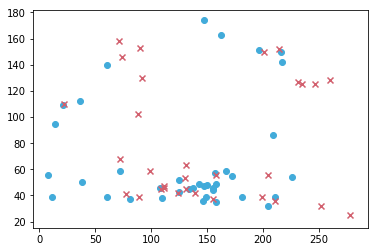

In [230]:
markkanen_makes = markkanen_data_frame[markkanen_data_frame.FGM==1]
markkanen_misses = markkanen_data_frame[markkanen_data_frame.FGM==0]
plt.scatter(markkanen_makes.SX, 
            markkanen_makes.SY, 
            c=[0.259, 0.672, 0.854], marker='o')
plt.scatter(markkanen_misses.SX, 
            markkanen_misses.SY, 
            c=[0.823, 0.378, 0.431], marker='x')

In [332]:
img_2 = plt.imread("../Data/basket_image_fiba/basket_image_color.png")

In [333]:
markkanen_copy = markkanen_data_frame.copy()
markkanen_copy.SX = 281 - markkanen_copy.SX # magic numbersss
markkanen_copy.SX = markkanen_copy.SX/float(max(markkanen_copy.SX)) * 740 # more magicc
markkanen_copy.SY = markkanen_copy.SY/float(max(markkanen_copy.SY)) * 460 # magic
markkanen_makes = markkanen_copy[markkanen_copy.FGM==1]
markkanen_misses = markkanen_copy[markkanen_copy.FGM==0]

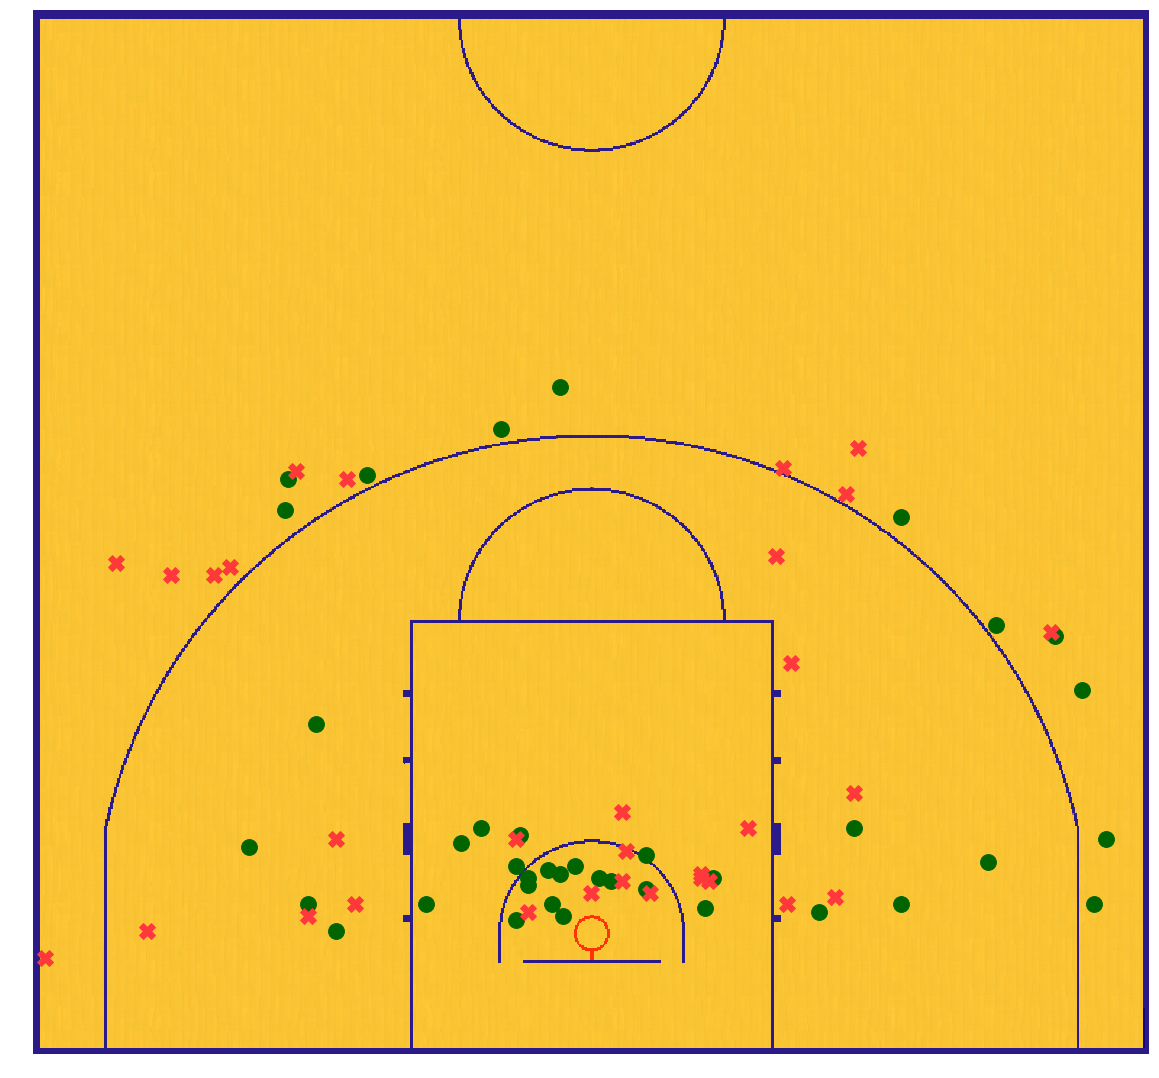

In [361]:
plt.figure(figsize=(20, 20))
plt.imshow(img_2, extent=[0, 770, 0, 720])
plt.axis('off')
plt.scatter(markkanen_makes.SX, 
            markkanen_makes.SY, 
            c="#006400", marker='o', s=250)
plt.scatter(markkanen_misses.SX, 
            markkanen_misses.SY, 
            c=[1.0, 0.22, 0.231], marker='X', s=250)
#plt.savefig("../../markkanen_shot_chart.png")

In [339]:
markkanen_clutch = markkanen_copy.loc[(markkanen_copy.TIME <= 120) & (markkanen_copy.QT >= 4)]

In [350]:
markkanen_clutch_makes = markkanen_clutch[markkanen_clutch.FGM==1]
markkanen_clutch_misses = markkanen_clutch[markkanen_clutch.FGM==0]

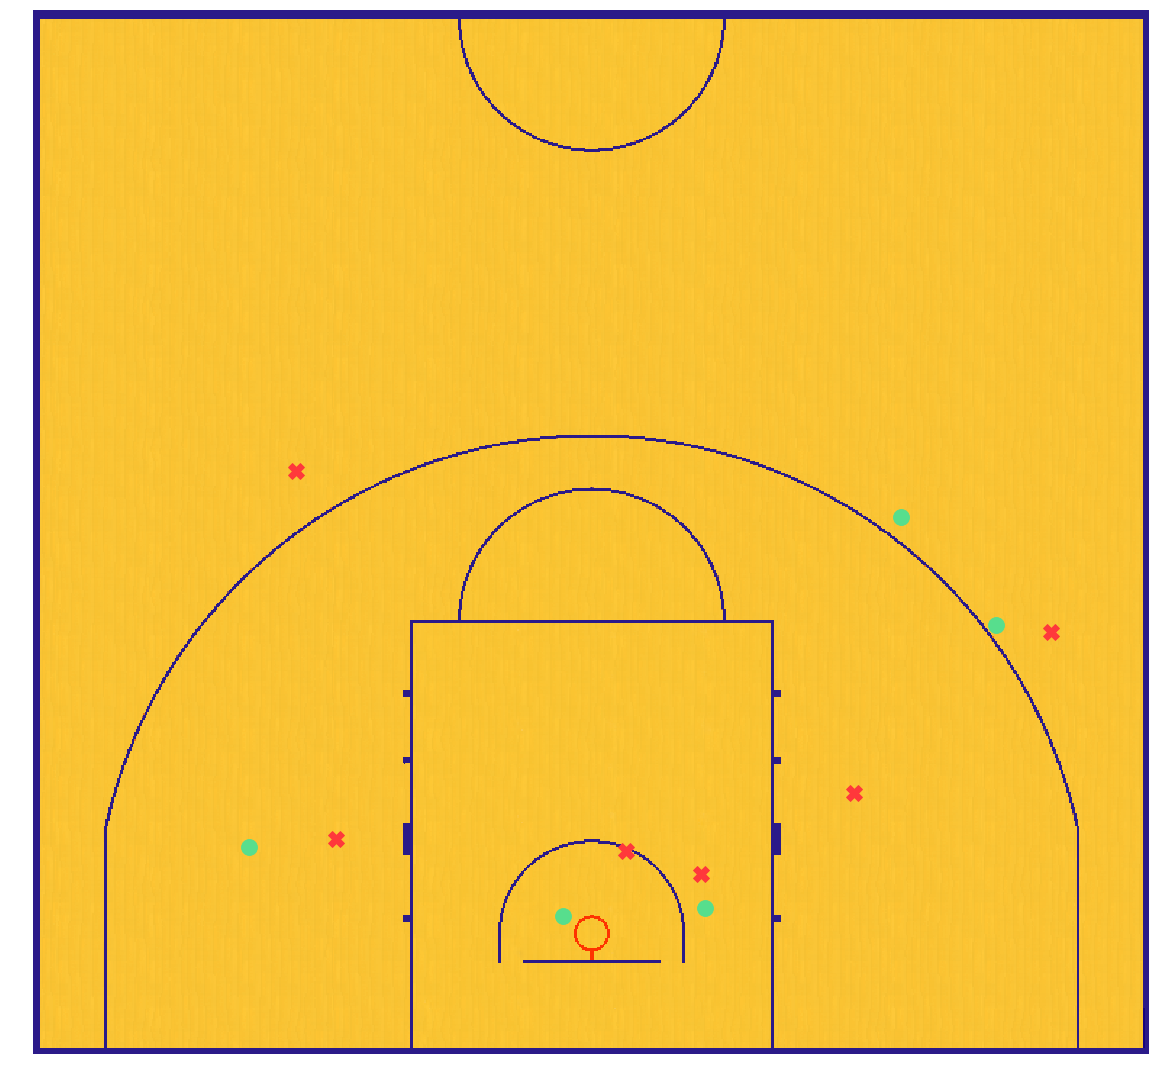

In [351]:
plt.figure(figsize=(20, 20))
plt.imshow(img_2, extent=[0, 770, 0, 720])
plt.axis('off')
plt.scatter(markkanen_clutch_makes.SX, 
            markkanen_clutch_makes.SY, 
            c=[0.341, 0.872, 0.554], marker='o', s=250)
plt.scatter(markkanen_clutch_misses.SX, 
            markkanen_clutch_misses.SY, 
            c=[1.0, 0.22, 0.231], marker='X', s=250)
#plt.savefig("../../markkanen_shot_chart_clutch.png")